#Semana 7: Data Analysis with Python (IBM)
Christian Emilio Saldana Lopez - A00506509

Un modelo es una ecuacion que te puede ayudar a predecir un valor en base a las variables incluidas. 

Modelo linea simple esta basado en una sola variable (x) para predecir un valor (y). Hay 2 metodos principales el fit & predict. El fit es entrenamiento y predict es hacer la evaluacion. 

Modelo multiple linear esta basado en varias variables (xs) para hacer la prediccion de la variable y. Se utilizan los mismos metodos fit & predict para entrenar y hacer la prediccion. 

A los datos hay que hacer normalizacion y transformacion. Posteriormente se le aplicar el modelo predictivo. Se puede utilizar un pipeline que recibe como parametros las funciones y al mismo pipeline aplicarle los metodos de fit & prediction. 

Manejo de errores se utilize MSE. Para evaluar los resultados. Se utiliza la y real y la y' que fue la prediccion para ver que tan acertado es el modelo. Son metricas de desempeno. 

#Lab

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [2]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression()

In [5]:
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X,Y)
Yhat=lm.predict(X)
Yhat[0:5]




array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [4]:
lm.intercept_

38423.3058581574

In [6]:
lm.coef_

array([-821.73337832])

Multiple linear regression

In [7]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [8]:
lm.fit(Z, df['price'])

LinearRegression()

In [9]:
lm.intercept_

-15806.62462632922

In [10]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

Visualization

In [11]:
import seaborn as sns
%matplotlib inline 

(0.0, 48171.44333281363)

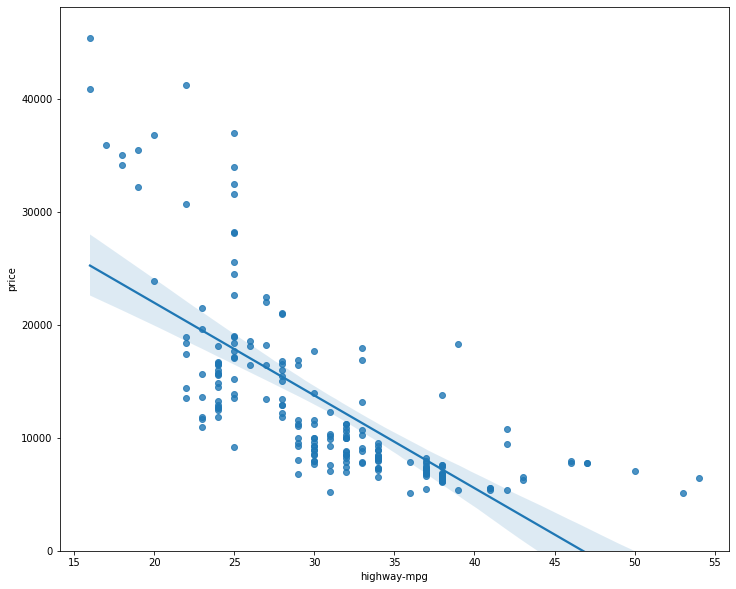

In [12]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

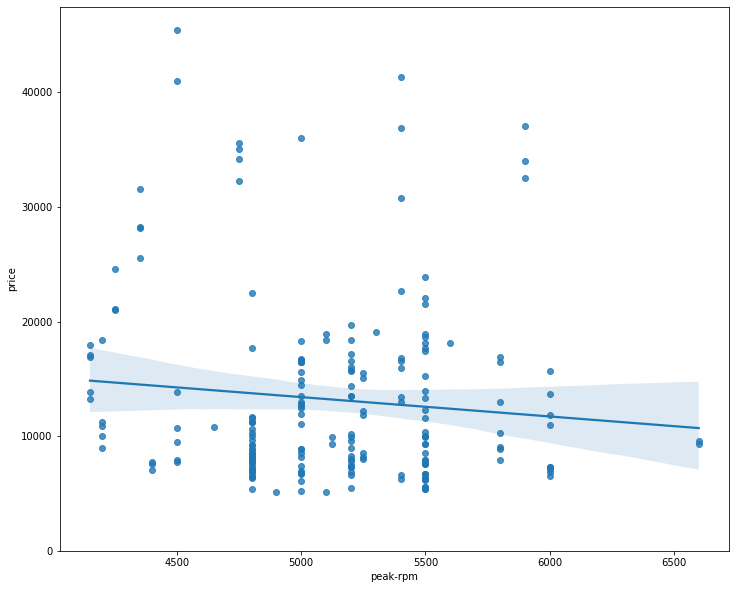

In [13]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

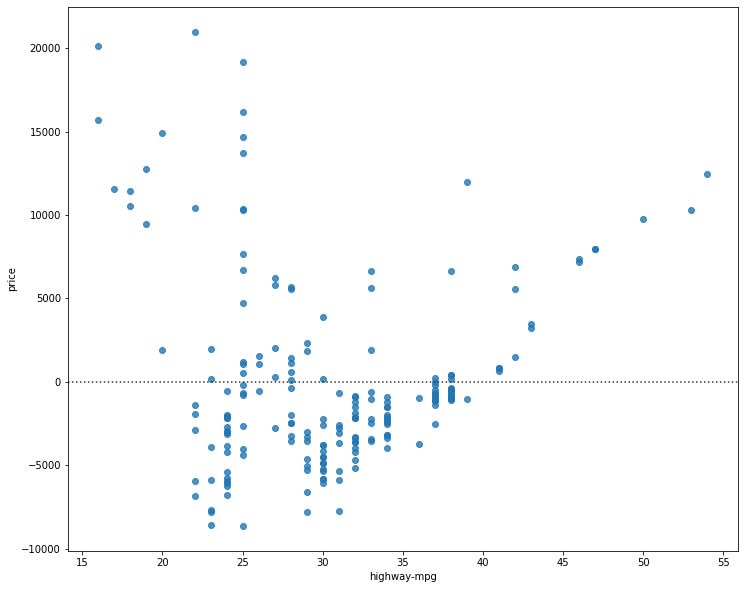

In [14]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

Multiple Linear Regression

In [15]:
Y_hat = lm.predict(Z)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


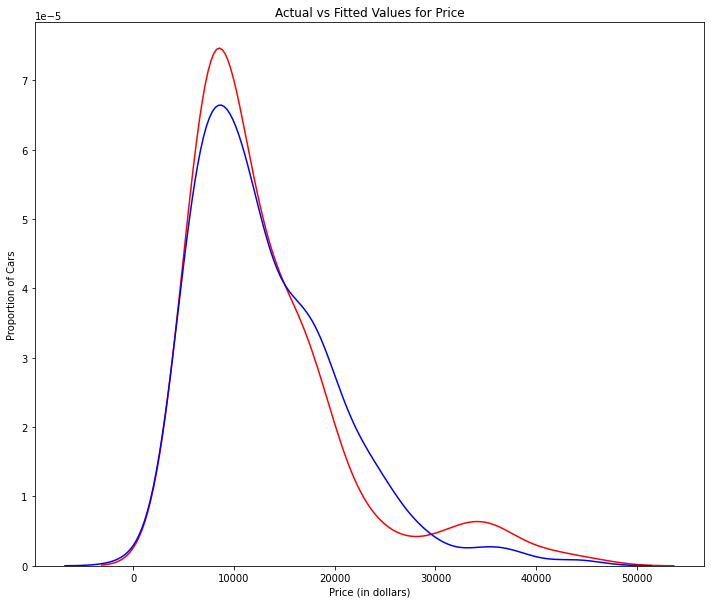

In [16]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

Pipeline

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [20]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [21]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [22]:
Z_pr=pr.fit_transform(Z)

In [23]:
Z.shape

(201, 4)

In [24]:
Z_pr.shape

(201, 15)

In [25]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [27]:
x = df['highway-mpg']
y = df['price']
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [28]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


In [30]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [31]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [32]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

Measure

In [33]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


In [34]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


In [37]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [38]:
Y_predict_multifit = lm.predict(Z)

In [39]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


In [40]:
from sklearn.metrics import r2_score

In [41]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


In [42]:
mean_squared_error(df['price'], p(x))

20474146.426361218

Evaluation

In [43]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [44]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [45]:
lm.fit(X, Y)
lm

LinearRegression()

In [46]:
yhat=lm.predict(new_input)
yhat[0:5]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

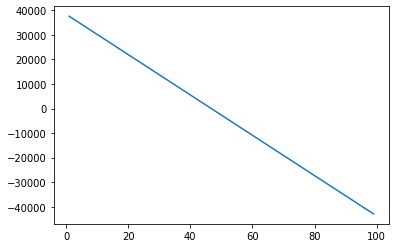

In [47]:
plt.plot(new_input, yhat)
plt.show()

#Quiz

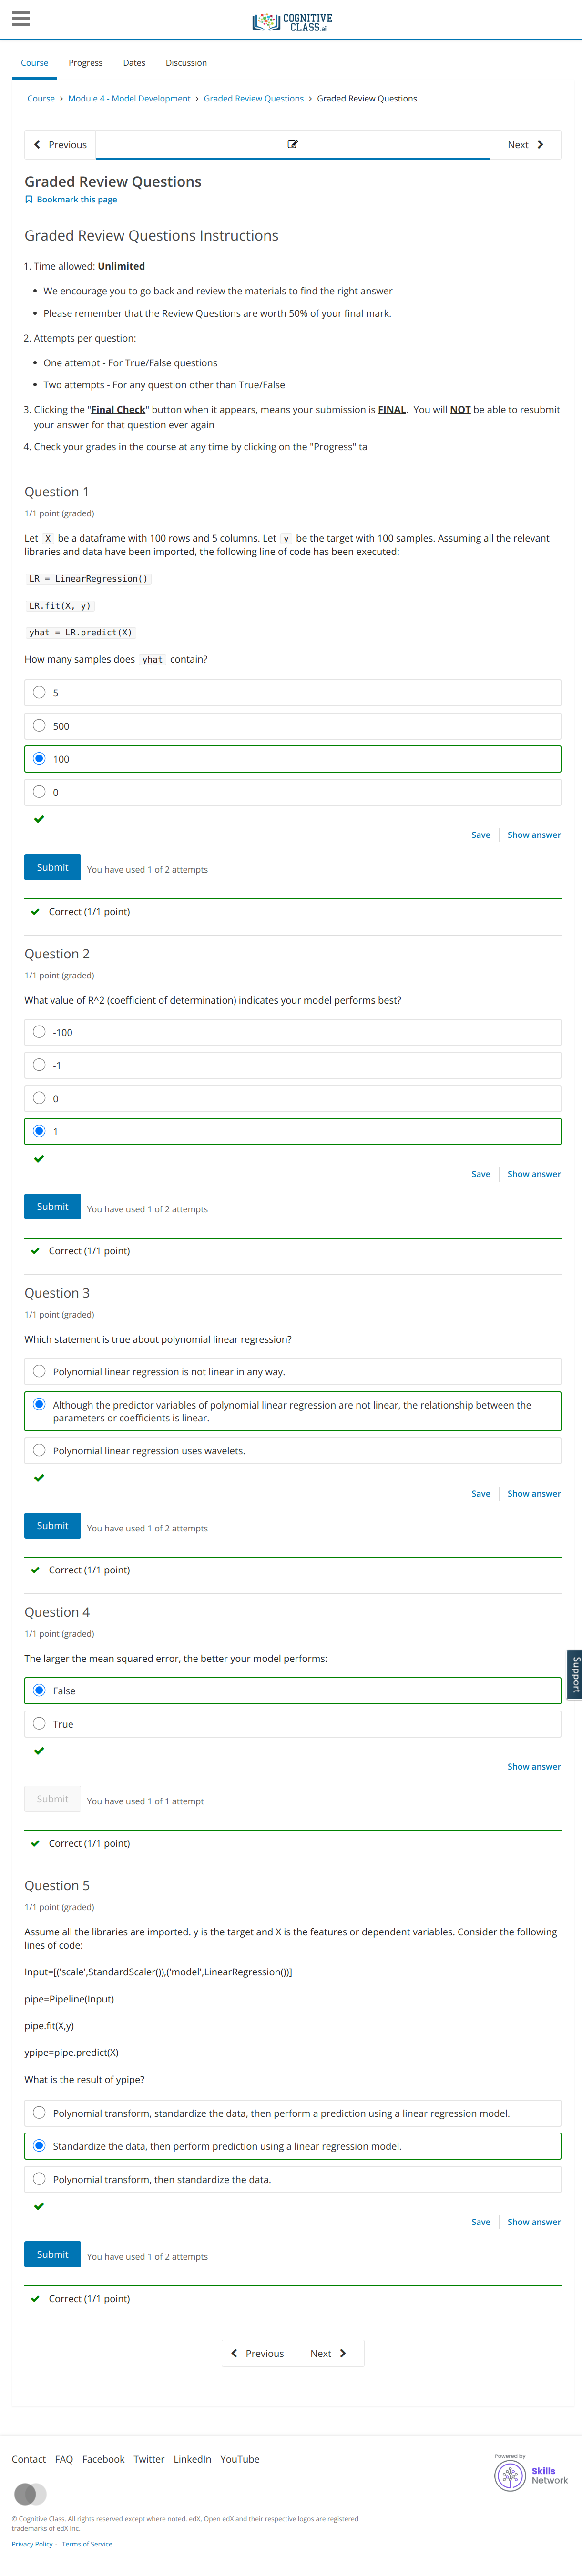